# 1. Titanic Dataset

**Objective: Analyze passenger data to determine survival rates based on features like age, gender, and class.**



In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

titanic = pd.read_csv("titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Total no of males and females in the dataset
gender= titanic["Sex"].value_counts()
gender



Sex
male      266
female    152
Name: count, dtype: int64

In [5]:
# Using sum method 
titanic_males = (titanic["Sex"]== "male").sum()
print(titanic_males)

titanic_fem = (titanic["Sex"]== "female").sum()
print(titanic_fem)


266
152


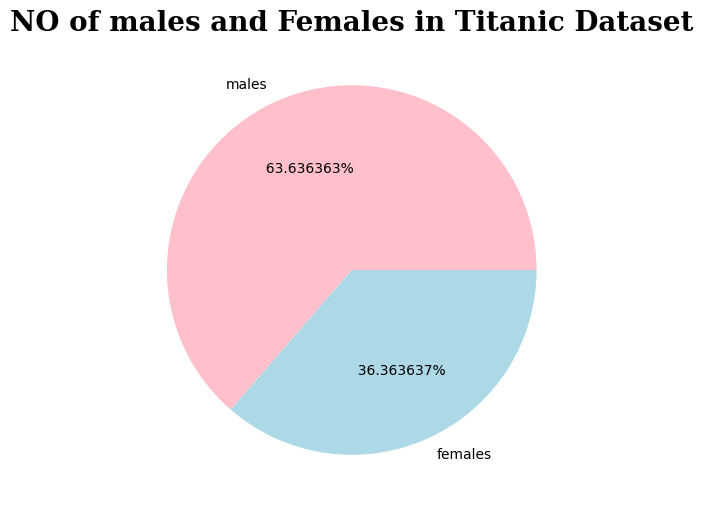

In [6]:
# Plotting the "Sex" column using pie chart
plt.figure(figsize=(10, 6))

# labels
labels=["males","females"]

#colors
colors = ["pink", "lightblue"]

# Title
plt.title("NO of males and Females in Titanic Dataset", fontsize=20,
          fontdict={'fontweight': 'bold' ,'color': 'black',   'family': 'serif'})

plt.pie([titanic_males, titanic_fem],autopct='%11f%%', labels=labels, colors=colors)

plt.show()

**1 Survival rates based on gender**

In [7]:
titanic .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
# turning the categorical variable to numerical
titanic["Survived"] = titanic["Survived"].astype("int64")

In [9]:
survival_by_gender= titanic.groupby("Sex")["Survived"].mean()
survival_by_gender

Sex
female    1.0
male      0.0
Name: Survived, dtype: float64

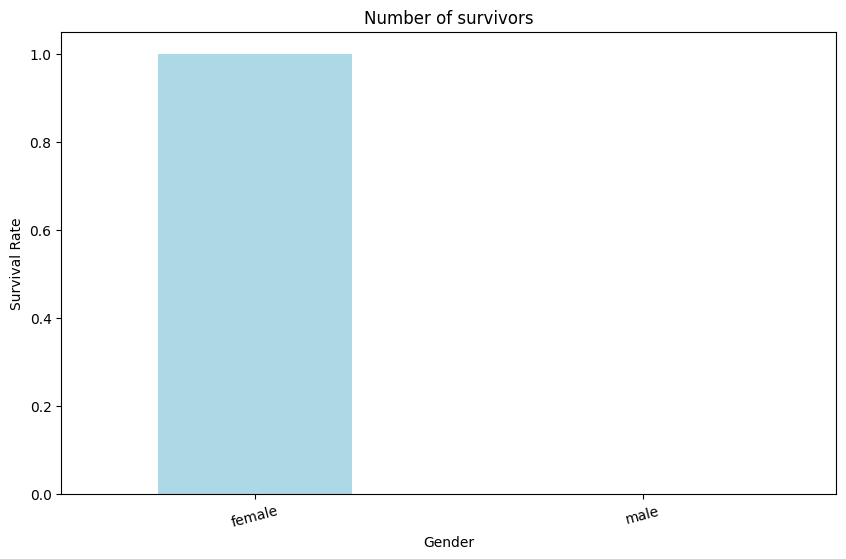

In [10]:
# plotting thr survival rate
survival_by_gender.plot(kind="bar", figsize=(10, 6), color=["lightblue", "pink"])

# title
plt.title("Number of survivors")

#labels
plt.xlabel("Gender")
plt.ylabel("Survival Rate")

plt.xticks(rotation=15)

plt.show()

In [11]:
# Analyzing survivors by age uisng np.select into groups
conditions = [
    (titanic["Age"] < 18),
    (titanic["Age"] >= 18) & (titanic["Age"] < 30),
    (titanic["Age"] >= 30) & (titanic["Age"] < 50),
    (titanic["Age"] >= 50)
]

choices= ["Child" ,"Teenager","Adult","Senior"]

titanic["AgeGroup"]=np.select(conditions,choices,default="np.nan")
titanic[["Age","AgeGroup"]].head()



,Age,AgeGroup
0,34.5,Adult
1,47.0,Adult
2,62.0,Senior
3,27.0,Teenager
4,22.0,Teenager


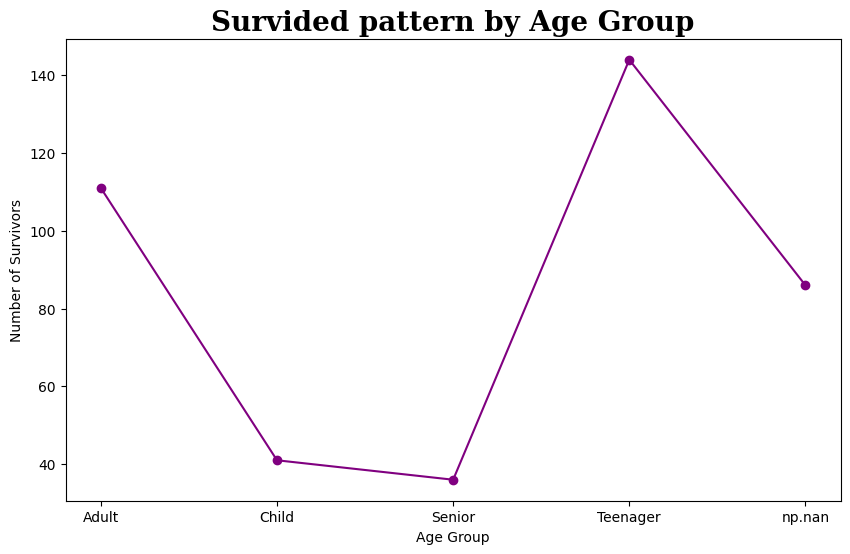

In [12]:
# plot line graph for age groups
plt.figure(figsize=(10, 6))

#title
plt.title("Survided pattern by Age Group", fontsize=20,
          fontdict={'fontweight': 'bold' ,'color': 'black',   'family': 'serif'})

# labels
plt.xlabel("Age Group")
plt.ylabel("Number of Survivors")


plt.plot(titanic["AgeGroup"].value_counts().sort_index(), marker='o', color='purple')


**Analyzing passengers based on class**

In [13]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [14]:
titanic["Pclass"]=titanic["Pclass"].astype("float")

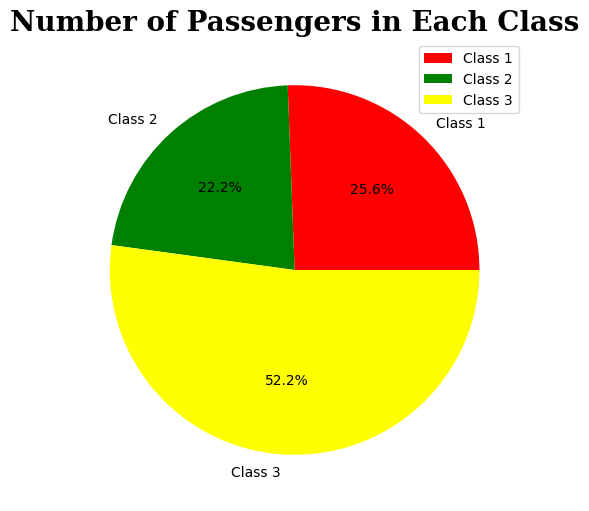

In [15]:
class1 =  titanic[titanic["Pclass"] == 1].count()[0]
class1

class2 = titanic[titanic["Pclass"] == 2].count()[0]
class2

class3 = titanic[titanic["Pclass"] == 3].count()[0]
class3

plt.figure(figsize=(10, 6))

# Plotting the number of passengers in each class

classes =[class1, class2, class3]

labels = ["Class 1", "Class 2", "Class 3"]

colors=["Red","Green","Yellow"]

plt.pie(classes ,labels=labels , colors=colors, autopct='%1.1f%%')

#title
plt.title("Number of Passengers in Each Class", fontsize=20, fontdict={'fontweight': 'bold', 'color': 'black', 'family': 'serif'})


plt.legend()
plt.show()